In [1]:
import numpy as np
import rasterio as rs
import hickle as hkl
import os
import hickle as hkl
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob



In [118]:
path = "../../src/before.npy"
before = np.load(path)

In [119]:
path = "../../src/after.npy"
after = np.load(path)

<AxesSubplot:>

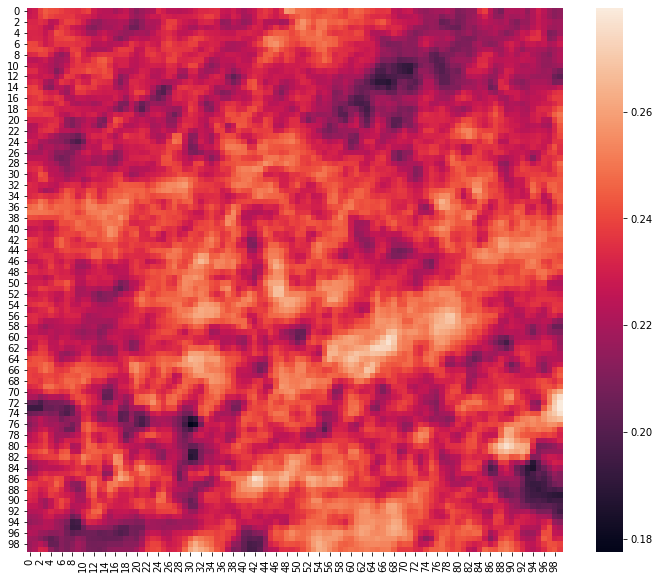

In [120]:
#x = np.load("../../src/s2_rolling.npy")
plt.figure(figsize=(12,10))
sns.heatmap(after[1, :100, :100, 9])

<AxesSubplot:>

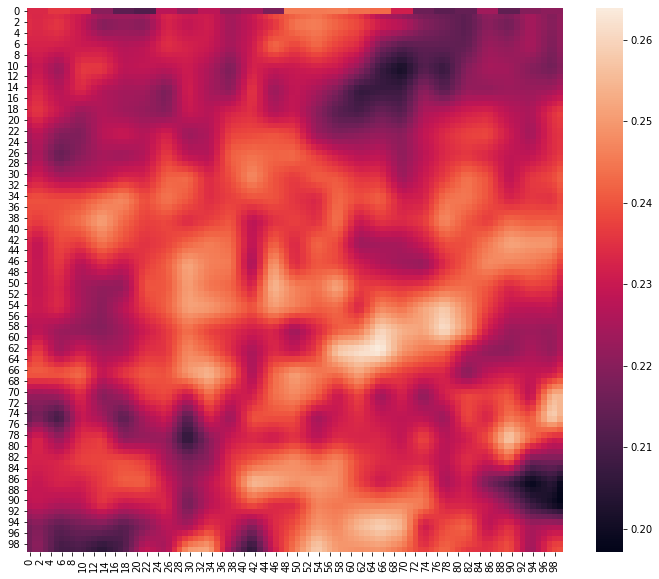

In [121]:
#x = np.load("../../src/s2_rolling.npy")
plt.figure(figsize=(12,10))
sns.heatmap(before[1, :100, :100, 9])

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: arrays must all be same length

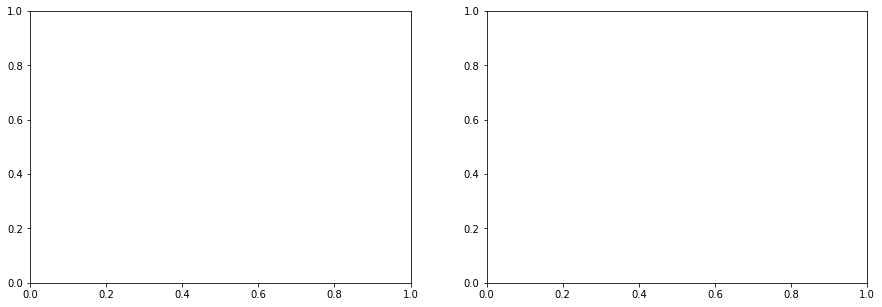

In [744]:
# Without 2, old
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot([x for x in range(72)], seventytwo[:, 0, 0, 0], ax=axarr[0])
g = sns.scatterplot([x for x in range(12)], smooth[:, 0, 0, 0], ax=axarr[1])
g.set(ylim = (np.min(seventytwo[:, 0, 0, 0]), np.max(seventytwo[:, 0, 0, 0])))
plt.show()



In [128]:
path = '../../src/s2_rolling.npy'
pre = np.load(path)

path = '../../src/pre.npy'
adj = np.load(path)

path = '../../src/shadow.npy'
shad = np.load(path)

path = '../../src/interp.npy'
interp = np.load(path)



In [34]:
path = '../../src/subset.npy'
interp = np.load(path)




<AxesSubplot:>

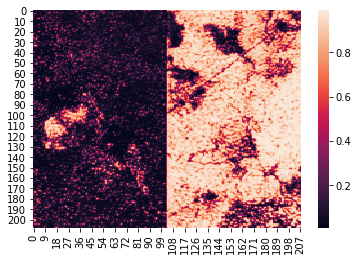

In [44]:
x = np.load("../../project-monitoring/tiles/2444/962/processed/right514/0.npy")
sns.heatmap(x)

In [45]:
np.mean(x[:, :208 // 2])

0.1307597

In [47]:
np.mean(x[:, 208 // 2:])

0.7403355

<AxesSubplot:>

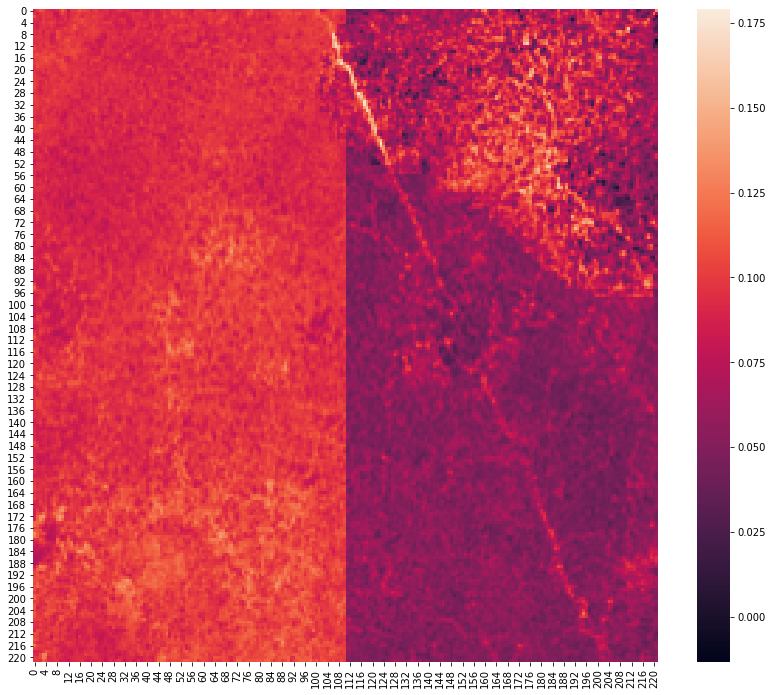

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))


sns.heatmap(interp[5, ..., 0])

<AxesSubplot:>

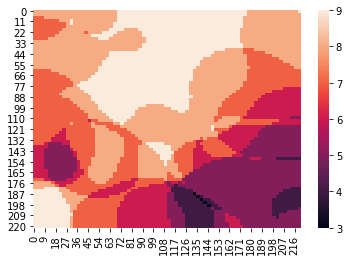

In [130]:
sns.heatmap(interp.shape[0] - np.sum(interp > 0, axis = 0))

NameError: name 'adj' is not defined

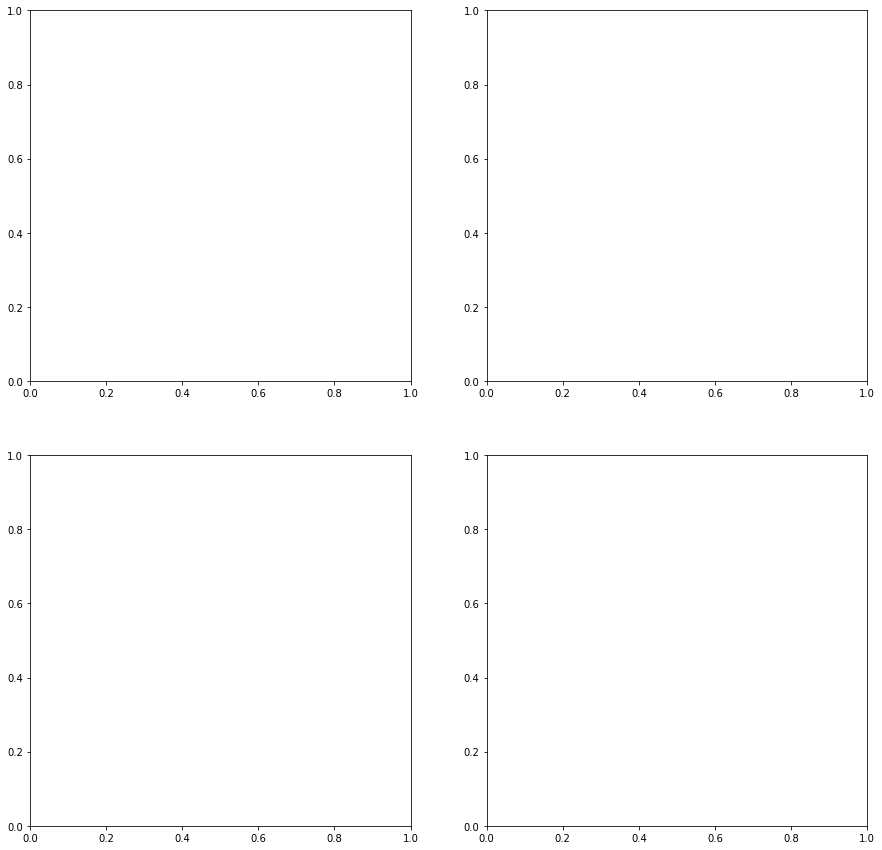

In [6]:

idx = 8
f, axarr = plt.subplots(2, 2, figsize=(15,15))

axarr[0, 0].imshow(adj[idx, ..., 0])
axarr[0, 1].imshow(pre[idx, ..., 0])# 0])
axarr[1, 0].imshow(shad[idx, ...])
axarr[1, 1].imshow(interp[idx,])# 0])
plt.show()

In [15]:
def fspecial_gauss(size, sigma):
        x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
        g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
        return g

In [630]:
np.max((arr + 2*left) / 2)

1.5

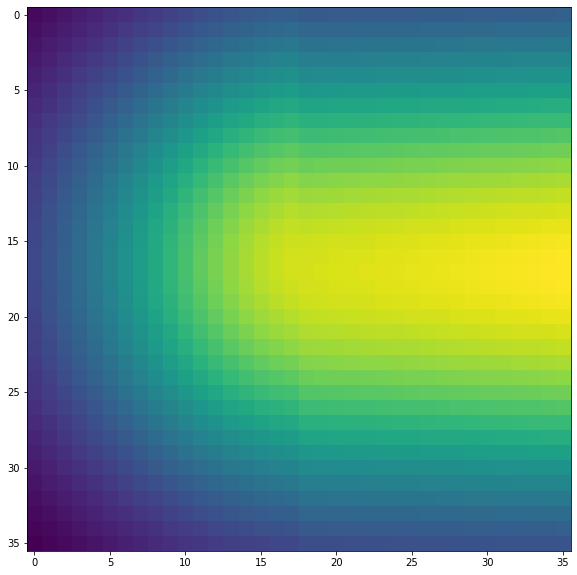

In [1839]:
def _fspecial_gauss_x(size, sigma):
        x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
        g = np.exp(-((x**1 + y**2)/(2.0*sigma**2)))
        return g
    
left = _fspecial_gauss_x(36, 12)
left[:, :18] = 1.
left = left * _fspecial_gauss_x(36, 12).T
right = np.flip(left, 1)
top = left.T
down = right.T

top = top[..., np.newaxis]
down = down[..., np.newaxis]
left = left[..., np.newaxis]
right = right[..., np.newaxis]

plt.figure(figsize=(20,10))
plt.imshow(right[..., 0])
#plt.imshow(left)
plt.show()

In [579]:
from scipy.ndimage import gaussian_filter

def pyramid(n):
    r = np.arange(n)
    d = np.minimum(r,r[::-1])
    return np.minimum.outer(d,d)

x = gaussian_filter(arr, 3)

<AxesSubplot:>

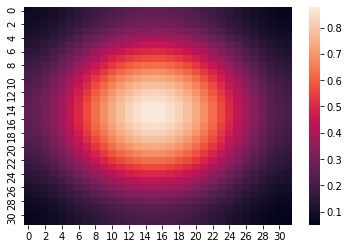

In [580]:
sns.heatmap(x)